# Machine Learning Project - Wine

## Overview

1. Discovery
2. Exploratory Data Analysis
    1. Missing values
    2. Classes distribution
    3. Choose the proper metric
    4. Features correlation
3. Data Manipulation
    1. Features and target
    2. Train test split
    3. Encoding
4. Baseline Model
5. Feature Engineering
    1. Resampling
    2. Feature scaling
6. Machine Learning Model
    1. Spot-Check
    2. Model tuning
    3. Model testing
7. Features Reduction
8. Principal Components Analysis and Decision Boundary
    1. Principal Components Analysis
    2. Decision Boundary
9. Conclusion

In [1]:
# import all necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import colors
from sklearn import datasets
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder
from sklearn.model_selection import train_test_split, RandomizedSearchCV, cross_val_score
from sklearn.metrics import f1_score, confusion_matrix, ConfusionMatrixDisplay
from sklearn.linear_model import LogisticRegression, RidgeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.decomposition import PCA
from imblearn.over_sampling import SMOTE
from sklearn.feature_selection import RFECV

## Discovery

Import the dataset from Scikit-learn toy datasets and display the description.

In [2]:
wine = datasets.load_wine(as_frame=True)
print(wine['DESCR'])

.. _wine_dataset:

Wine recognition dataset
------------------------

**Data Set Characteristics:**

    :Number of Instances: 178
    :Number of Attributes: 13 numeric, predictive attributes and the class
    :Attribute Information:
 		- Alcohol
 		- Malic acid
 		- Ash
		- Alcalinity of ash  
 		- Magnesium
		- Total phenols
 		- Flavanoids
 		- Nonflavanoid phenols
 		- Proanthocyanins
		- Color intensity
 		- Hue
 		- OD280/OD315 of diluted wines
 		- Proline

    - class:
            - class_0
            - class_1
            - class_2
		
    :Summary Statistics:
    
    ============================= ==== ===== ======= =====
                                   Min   Max   Mean     SD
    ============================= ==== ===== ======= =====
    Alcohol:                      11.0  14.8    13.0   0.8
    Malic Acid:                   0.74  5.80    2.34  1.12
    Ash:                          1.36  3.23    2.36  0.27
    Alcalinity of Ash:            10.6  30.0    19.5   3.3
    Ma

The dataset contains values obtained from chemical analysis performed on 3 types of wines.

The objective of this research is to build a model capable of classifying the wine into one of the 3 categories based on its chemical characteristics.

Therefore, I have a classification problem for which I am using a supervised learning model.

I continue my research with Exploratory Data Analysis with the goal of better understanding the data structure and selecting the best model.

## Exploratory Data Analysis

I get the the values as DataFrame and display a preview.

In [3]:
df = wine['frame']
df.head()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,target
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0,0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0,0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0,0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0,0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0,0


### Missing values
I check for missing values.

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 14 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   alcohol                       178 non-null    float64
 1   malic_acid                    178 non-null    float64
 2   ash                           178 non-null    float64
 3   alcalinity_of_ash             178 non-null    float64
 4   magnesium                     178 non-null    float64
 5   total_phenols                 178 non-null    float64
 6   flavanoids                    178 non-null    float64
 7   nonflavanoid_phenols          178 non-null    float64
 8   proanthocyanins               178 non-null    float64
 9   color_intensity               178 non-null    float64
 10  hue                           178 non-null    float64
 11  od280/od315_of_diluted_wines  178 non-null    float64
 12  proline                       178 non-null    float64
 13  targe

There are no missing values.

### Classes distribution

I check if the classes are balanced.

target
1    71
0    59
2    48
Name: count, dtype: int64


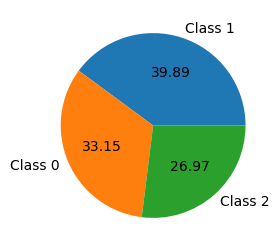

In [5]:
print(df['target'].value_counts())

plt.figure(figsize=(3,3))
plt.pie(df['target'].value_counts(), labels=['Class 1', 'Class 0', 'Class 2'], autopct='%.2f')
plt.show()

The most prevalent class is class 1, comprising 40% of the total elements, which is 13% more than class 2 and 6% more than class 0. Therefore, after dividing the dataset into train and test sets, I perform resampling on the train set.

### Choose the proper metric

There are several metrics that can be relevant for evaluating the performance of a binary classification model. The most common ones are:

- **Accuracy**:
    - Calculated as the ratio of the total number of correct predictions (TP + TN) to the total number of instances.
    - Accuracy = (TP + TN) / (TP + TN + FP + FN)

- **Precision**:
    - Calculated as the ratio of true positives (TP) to the sum of true positives and false positives (FP).
    - Precision = TP / (TP + FP)

- **Recall (True Positive Rate)**:
    - Calculated as the ratio of true positives (TP) to the sum of true positives and false negatives (FN).
    - Recall = TP / (TP + FN)

- **F1-Score**:
    - Useful when you want to find a balance between precision and recall.
    - F1-Score = 2 * (Precision * Recall) / (Precision + Recall)

- **Specificity (True Negative Rate)**:
    - Calculated as the ratio of true negatives (TN) to the sum of true negatives and false positives (FP).
    - Specificity = TN / (TN + FP)

- **ROC-AUC (Area Under the Receiver Operating Characteristic Curve)**:
    - Represents the true positive rate (recall) versus the false positive rate as the model's decision threshold varies.
    - This metric takes into account all decision thresholds and provides an assessment of the model's discriminatory ability.

- **Precision-Recall Curve**:
    - Shows the trade-off between precision and recall as the model's decision threshold varies.
    - The area under the curve provides a measure of the model's predictive capability on imbalanced classes.

For evaluating the goodness of models in this project, I use the F1-Score, which works well even for imbalanced classes.

### Features correlation

I check which features have high linear correlation using a heatmap.

   Very strong  Strong  Moderate  Weak  Very weak
0            1       5        16    31         25


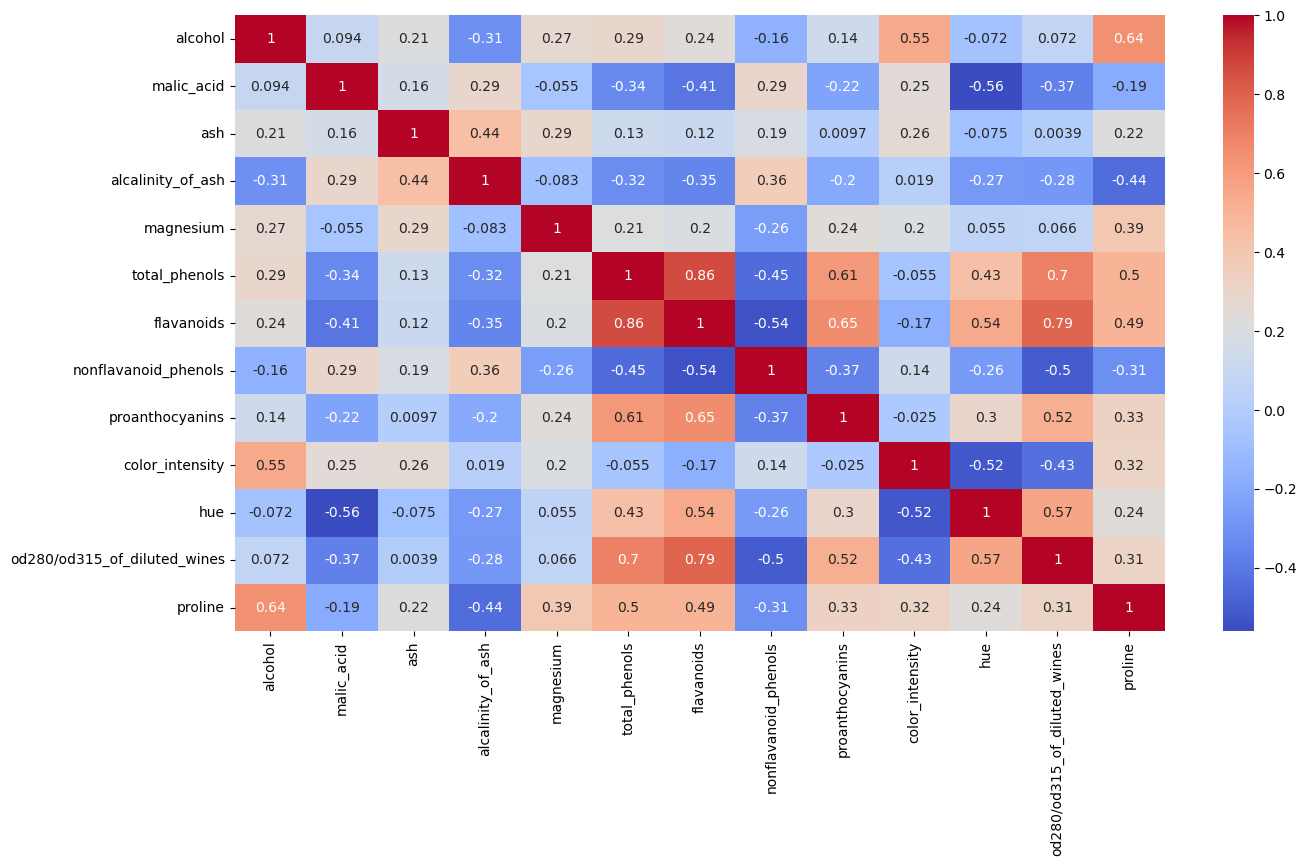

In [6]:
correlation_matrix = df.drop('target', axis=1).corr()

correlation_matrix_test = correlation_matrix.apply(pd.to_numeric)

very_strong = 0
strong = 0
moderate = 0
weak = 0
very_weak = 0 

for row in correlation_matrix_test.index:
    for col in correlation_matrix_test.columns:
        if correlation_matrix_test.loc[row, col] != 1:
            if correlation_matrix_test.loc[row, col] >= 0.8 or correlation_matrix_test.loc[row, col] <= -0.8:
                very_strong += 0.5
            elif correlation_matrix_test.loc[row, col] >= 0.6 or correlation_matrix_test.loc[row, col] <= -0.6:
                strong += 0.5
            elif correlation_matrix_test.loc[row, col] >= 0.4 or correlation_matrix_test.loc[row, col] <= -0.4:
                moderate += 0.5
            elif correlation_matrix_test.loc[row, col] >= 0.2 or correlation_matrix_test.loc[row, col] <= -0.2:
                weak += 0.5
            else:
                very_weak += 0.5

table = pd.DataFrame([[int(very_strong), int(strong), int(moderate), int(weak), int(very_weak)]],
                     columns=['Very strong', 'Strong', 'Moderate', 'Weak', 'Very weak'])
print(table)

plt.figure(figsize=(15, 8))
sns.heatmap(correlation_matrix_test, annot=True, cmap='coolwarm')
plt.show()

Only one pair has a very strong correlation (>= 0.8):
- flavanoids / total_phenols: 0.86

Five pairs have strong correlations (0.6 / 0.79), including:
- 2 involve the feature: od280/od315_of_diluted_wines
- 2 involve the feature proanthocyanins

The remaining 70 pairs are all weaker:
- 16 pairs have moderate correlations (0.4 / 0.59)
- 31 pairs have weak correlations (0.2 / 0.39)
- 25 pairs have very weak correlations (0 / 0.19)

I'll continue the analysis on feature correlation with a pairplot to see if there are features more predictive than others.

<Figure size 1500x1500 with 0 Axes>

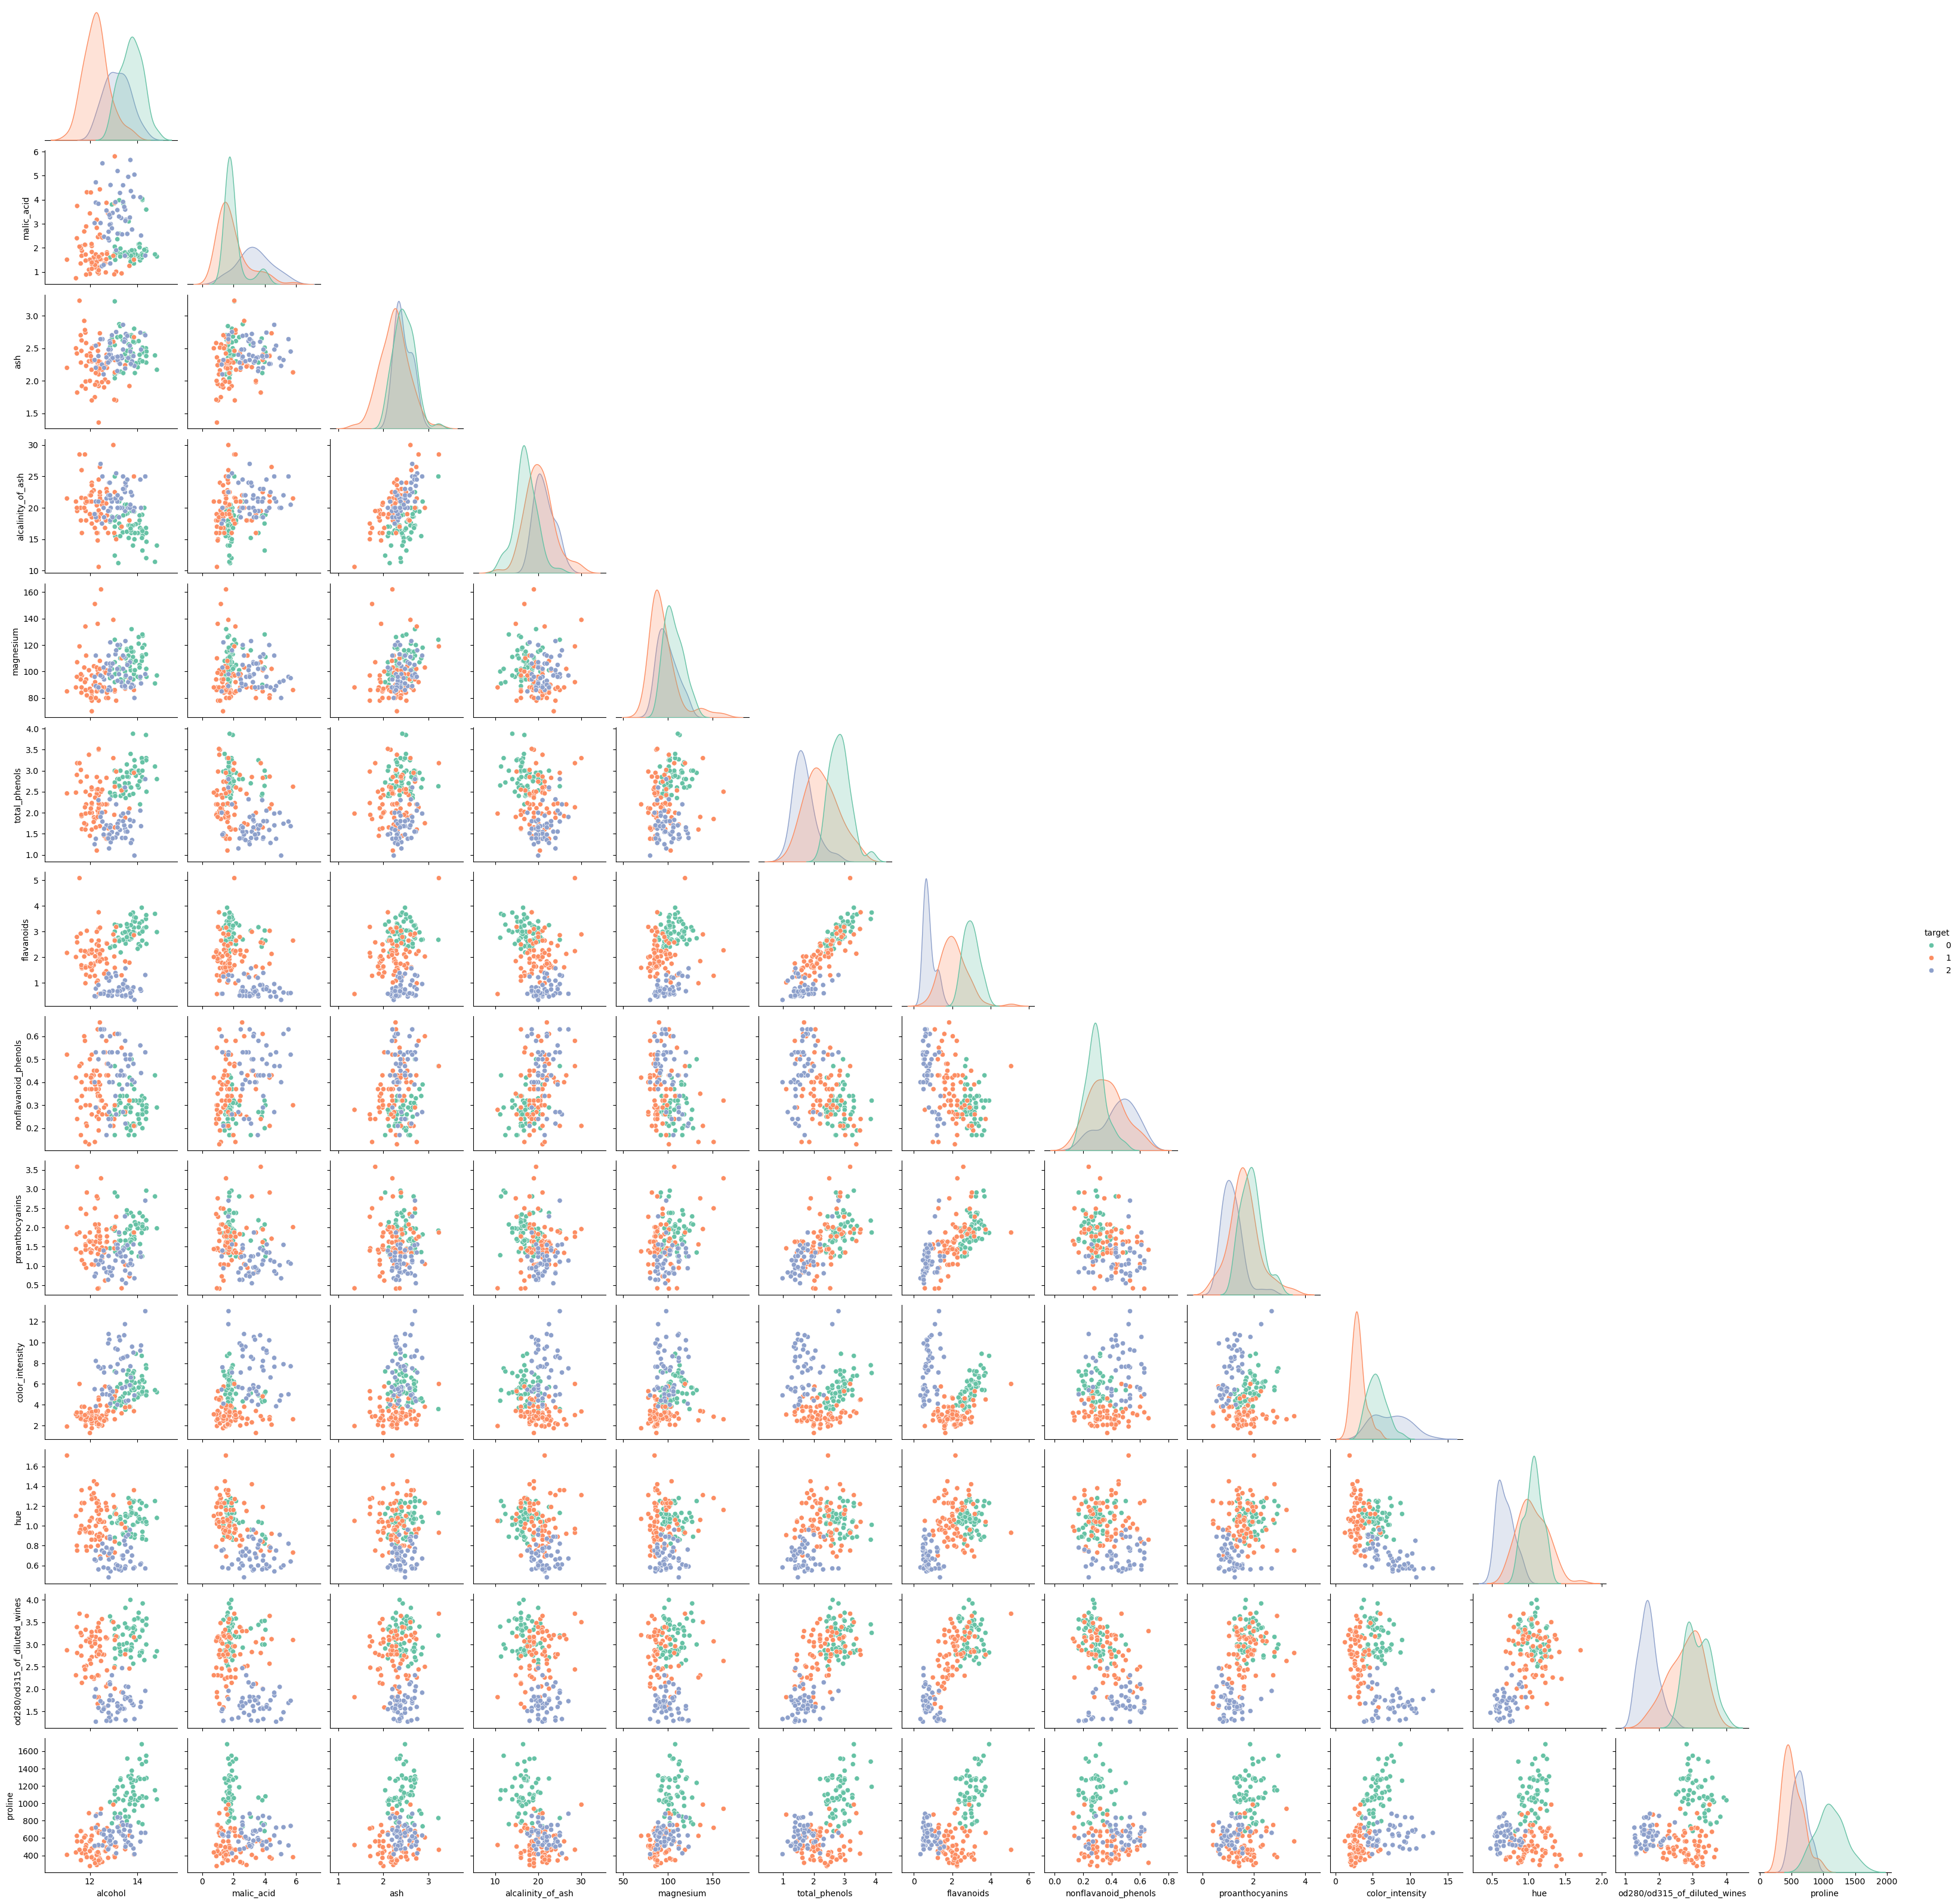

In [7]:
plt.figure(figsize=(15, 15))
sns.pairplot(df, hue='target', corner=True, palette='Set2')
plt.show()

Some features separate the classes quite well, while others do not.

For example, proline separates the classes effectively, while in the feature proanthocyanins, it's difficult to make distinctions.

For now, I decide to keep the entire dataset without reducing the number of features.

## Data Manipulation

### Features and target

I divide the DataFrame into independent variables (x) and dependent variables (y).

Then, I'll visualize the dimensions of x and y to check if I've separated them correctly.

Finally, I'll print all the target values to see how they are arranged. If they are ordered, I'll need to shuffle them.

In [8]:
x = df.drop('target', axis=1)
y = df[['target']]

print(x.shape, y.shape)

print(y.values.flatten())

(178, 13) (178, 1)
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2]


### Train test split

I split the data into train and test sets.

Since I noticed that the records are ordered based on the values of y, I'll shuffle them before splitting using the train_test_split method.

I specify random_state=0 to ensure reproducibility of the results.

In [9]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, stratify=y, random_state=0)

print(x_train.shape, x_test.shape, y_train.shape, y_test.shape)
print(y_train.value_counts(), y_test.value_counts())

(124, 13) (54, 13) (124, 1) (54, 1)
target
1         50
0         41
2         33
Name: count, dtype: int64 target
1         21
0         18
2         15
Name: count, dtype: int64


### Encoding

I use the one-hot encoding technique to transform the values of y because if I left the values as they are, my model would think there's a logical order between the wine classes.

In [10]:
encoder = OneHotEncoder(sparse_output=False, dtype=int)
encoder.fit(y_train)

y_train_encoded = encoder.transform(y_train)
y_test_encoded = encoder.transform(y_test)

print(y_train.shape, y_train_encoded.shape, y_test.shape, y_test_encoded.shape)

(124, 1) (124, 3) (54, 1) (54, 3)


## Baseline Model

I use Logistic Regression with default parameters to obtain an initial result before proceeding with Feature Engineering.

Baseline model f1-score on test set: 0.94482


C:\Users\Stefano\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


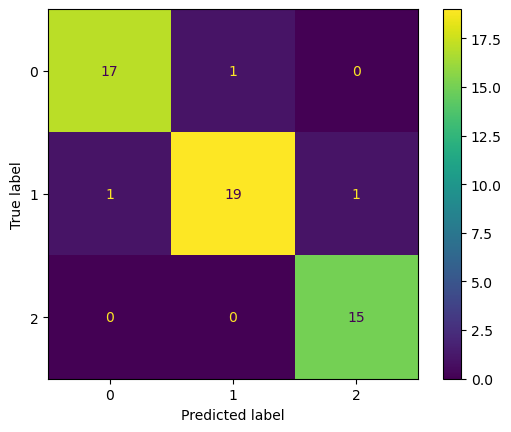

In [11]:
lr = LogisticRegression()

lr.fit(x_train, y_train.values.ravel())

predictions = lr.predict(x_test)

score = f1_score(predictions, y_test, average='weighted')
print('Baseline model f1-score on test set: {:.5f}'.format(score))
cm = confusion_matrix(y_test, predictions)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.show()

The model achieves an f1-score of 0.94, correctly identifying all records of class 2 but making some errors on classes 0 and 1.

I'll proceed with Feature Engineering to improve the result.

## Feature Engineering

### Resampling

I perform oversampling on the classes with fewer records using the SMOTE technique, which generates new records for minority classes.

I choose not to perform under-sampling because I already have a relatively low number of records, and I prefer to avoid losing important information.

I'm using the SMOTE technique rather than Random Oversampling because, as seen in the pairplot, the values are quite clustered by class, so it should generate fairly accurate synthetic records.

target
0         50
1         50
2         50
Name: count, dtype: int64


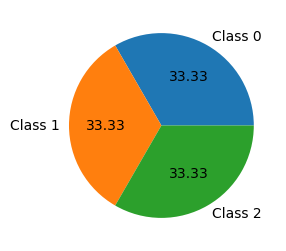

In [12]:
sm = SMOTE(sampling_strategy='not majority', random_state=0)

x_train, y_train = sm.fit_resample(x_train, y_train)

print(y_train.value_counts())

plt.figure(figsize=(3, 3))
plt.pie(y_train.value_counts(), labels=['Class 0', 'Class 1', 'Class 2'], autopct='%.2f')
plt.show()

### Features scaling

I scale the features.

In [13]:
scaler = MinMaxScaler()
scaler.fit(x_train)

x_train_scaled = scaler.transform(x_train)
x_train = pd.DataFrame(x_train_scaled, columns=x_train.columns)

x_test_scaled = scaler.transform(x_test)
x_test = pd.DataFrame(x_test_scaled, columns=x_test.columns)

x_train.describe()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
count,150.000000,150.000000,150.000000,150.000000,150.000000,150.000000,150.000000,150.000000,150.000000,150.000000,150.000000,150.000000,150.000000
mean,0.486648,0.344409,0.456560,0.454698,0.365569,0.443896,0.343930,0.489326,0.370350,0.315342,0.483586,0.458341,0.348727
std,0.233479,0.240832,0.166251,0.172301,0.165927,0.219443,0.225466,0.241701,0.187298,0.201501,0.238325,0.263076,0.234045
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.299168,0.180336,0.367647,0.354839,0.247251,0.241379,0.103376,0.313401,0.231218,0.147425,0.283249,0.191897,0.165478
50%,0.508692,0.228261,0.450980,0.443808,0.339506,0.444828,0.357595,0.472937,0.354430,0.289520,0.500000,0.538462,0.285788
75%,0.671053,0.509385,0.576603,0.549759,0.456790,0.635345,0.541139,0.674267,0.489715,0.429022,0.665555,0.680403,0.539943
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [14]:
x_test.describe()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
count,54.000000,54.000000,54.000000,54.000000,54.000000,54.000000,54.000000,54.000000,54.000000,54.000000,54.000000,54.000000,54.000000
mean,0.442982,0.307568,0.408013,0.397352,0.385688,0.429949,0.339506,0.435185,0.334212,0.288254,0.515879,0.485009,0.321459
std,0.227722,0.194359,0.185563,0.175229,0.181332,0.222618,0.199157,0.261316,0.161374,0.196770,0.261353,0.274009,0.205459
min,-0.111111,0.031621,-0.222222,-0.043011,0.135802,0.041379,0.027426,0.080000,-0.003165,-0.040853,0.063830,0.007326,0.026391
25%,0.278509,0.170455,0.326797,0.252688,0.234568,0.248276,0.164030,0.245000,0.228639,0.134547,0.319149,0.205128,0.161912
50%,0.437135,0.226285,0.401961,0.395161,0.345679,0.425862,0.362869,0.330000,0.329114,0.253996,0.537234,0.543956,0.279601
75%,0.611111,0.450593,0.527778,0.536290,0.503086,0.571552,0.506329,0.600000,0.436709,0.400533,0.688830,0.734432,0.432061
max,0.871345,0.764822,0.797386,0.838710,1.135802,0.989655,0.719409,1.060000,0.905063,0.793961,1.308511,0.970696,0.857347


## Machine Learning Model

### Spot-Check

For Spot-Checking, I'll use a linear model, a non-linear model, and an ensemble model to see which option works best and then use it for the final model.

I'll use the following models:
- Linear Model:
    - Logistic Regression
- Non-linear Model:
    - K Nearest Neighbors
- Ensemble Model:
    - Random Forest

In [15]:
def define_models(models=dict()):
    # linear model
    models['logistic'] = LogisticRegression()
    # non-linear model
    models['knn'] = KNeighborsClassifier()
    # ensemble model
    models['rf'] = RandomForestClassifier(random_state=0)
    print('Defined {} models'.format(len(models)))
    return models

In [16]:
def evaluate_models(x, y, models):
    results=dict()
    for name, model in models.items():
        scores = cross_val_score(model, x, y, scoring='f1_weighted', cv=5, n_jobs=-1)
        if scores is not None:
            results[name] = scores
            mean_score, std_score = np.mean(scores), np.std(scores)
            print('>{}: {:.3f} (+/-{:.3f})'.format(name, mean_score, std_score))
        else:
            print('>{}: error'.format(name))
    return results

In [17]:
def summarize_results(results):
    if len(results) == 0:
        print('no results')
        return
    n = min(10, len(results))
    mean_scores = [(k, np.mean(v)) for k,v in results.items()]
    mean_scores = sorted(mean_scores, key=lambda x: x[1])
    mean_scores = list(reversed(mean_scores))
    names = [x[0] for x in mean_scores[:n]]
    scores = [results[x[0]] for x in mean_scores[:n]]
    print()
    for i in range(n):
        name = names[i]
        mean_score, std_score = np.mean(results[name]), np.std(results[name])
        print('Rank={}, Name={}, Score={:.3f} (+/-{:.3f})'.format(i+1, name, mean_score, std_score))
    plt.figure(figsize=(10, 5))
    plt.boxplot(scores, labels=names)
    plt.xticks(rotation='vertical', ha='center')

Defined 3 models
>logistic: 0.966 (+/-0.022)
>knn: 0.953 (+/-0.035)
>rf: 0.966 (+/-0.037)

Rank=1, Name=rf, Score=0.966 (+/-0.037)
Rank=2, Name=logistic, Score=0.966 (+/-0.022)
Rank=3, Name=knn, Score=0.953 (+/-0.035)


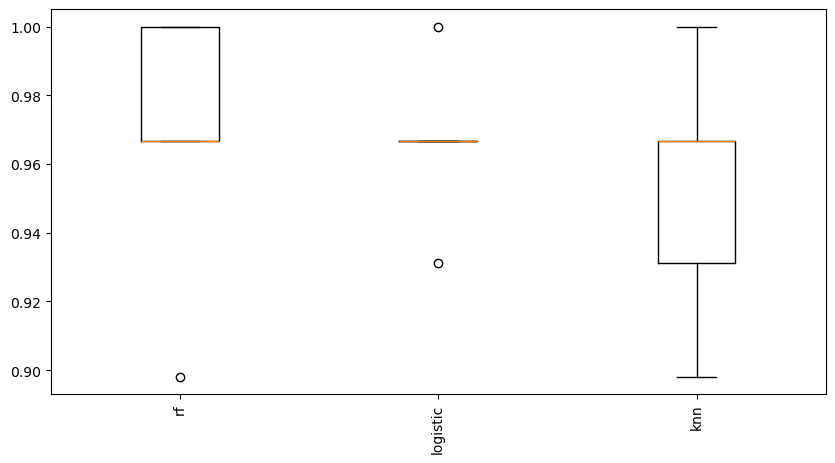

In [18]:
models = define_models()

results = evaluate_models(x_train, y_train, models)

summarize_results(results)

Logistic Regression and Random Forest models achieve the best results, with Logistic Regression having a lower standard deviation.

I decide to continue the analysis with a linear model, but instead of Logistic Regression, I prefer to use the Ridge Classifier, which is better suited for non-binary target problems.

### Model tuning

To optimize the model parameters, I decide to iterate over the following parameters:

- alpha:
    - Strength of regularization.
    - Default = 1.
    - Iterate between 0.05 and 2 with a step of 0.05.
- class_weight:
    - Weights associated with classes.
    - Default = None: all classes are considered weight 1.
    - Check values None and 'balanced', as the classes are imbalanced, it might be useful to consider different weights for classes.
- fit_intercept:
    - If set to False, the intercept for the model will not be calculated.
    - Default = True.
    - Check values True and False; I expect a better result with True.

This generates a total of 40 x 2 x 2 = 160 possible combinations. Using Random Search, I'll iterate over 100 of these combinations.

In [19]:
param_grid = [{
    'alpha' : np.arange(0.05, 2.05, 0.05),
    'class_weight' : [None, 'balanced'],
    'fit_intercept' : [True, False]
}]

optimal_params = RandomizedSearchCV(RidgeClassifier(),
                                    param_grid,
                                    n_iter=100,
                                    cv=5,
                                    scoring='f1_weighted',
                                    verbose=0,
                                    n_jobs=-1,
                                    random_state=0)

optimal_params.fit(x_train, y_train.values.ravel())

print(optimal_params.best_params_)

print(optimal_params.best_score_)

{'fit_intercept': True, 'class_weight': 'balanced', 'alpha': 0.05}
0.9795600111389586


### Model testing

Now that I have the best parameters, I use the test set to check the reliability of the model.

Ridge model f1-score on test set: 1.00000


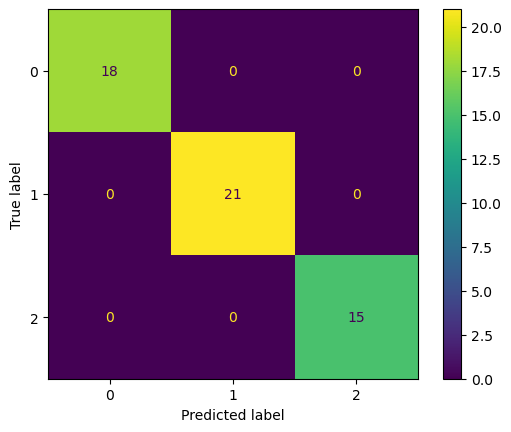

In [20]:
ridge = RidgeClassifier(fit_intercept=True, class_weight='balanced', alpha=0.05)

ridge.fit(x_train, y_train.values.ravel())

predictions = ridge.predict(x_test)

score = f1_score(predictions, y_test, average='weighted')
print('Ridge model f1-score on test set: {:.5f}'.format(score))
cm = confusion_matrix(y_test, predictions)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.show()

The model achieves an F1-Score of 1, correctly identifying all records. So I could end the analysis here, having found the optimal model.

However, I'll proceed with Feature Reduction for the following reasons:
- It's simpler to identify the factors influencing predictions.
- The model requires fewer computational resources for training and implementation, making it more efficient.
- By requiring fewer features, the cost of data collection is also reduced in case they are collected solely for the purpose of this analysis.

## Features Reduction

I'll use Recursive Feature Elimination with the already optimized model.

In [21]:
selector = RFECV(estimator=ridge, cv=5, step=1)
selector.fit(x_train, y_train.values.ravel())

selected_features = x_train.columns[selector.support_]

selected_features

Index(['alcohol', 'ash', 'alcalinity_of_ash', 'flavanoids', 'color_intensity',
       'hue', 'proline'],
      dtype='object')

In [22]:
x_train_sel = x_train[selected_features]
x_test_sel = x_test[selected_features]

x_train_sel.shape, x_test_sel.shape

((150, 7), (54, 7))

Ridge model f1-score on test set: 1.00000


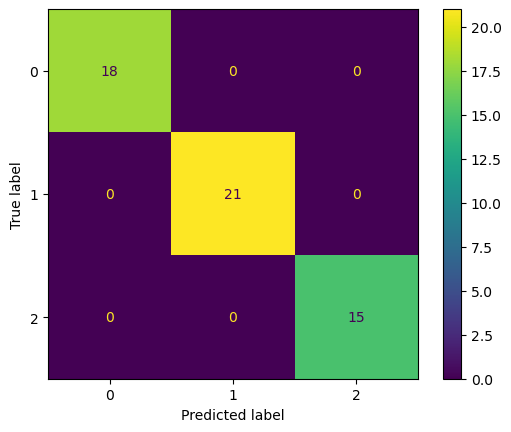

In [23]:
ridge.fit(x_train_sel, y_train.values.ravel())

predictions = ridge.predict(x_test_sel)

score = f1_score(predictions, y_test, average='weighted')
print('Ridge model f1-score on test set: {:.5f}'.format(score))
cm = confusion_matrix(y_test, predictions)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.show()

The model still achieves an F1-Score of 1, correctly identifying all records. So I can achieve the same result even with 7 features instead of 13.

## Principal Components Analysis and Decison Boundary

I want to graphically represent the dataset, but it's impossible for me to draw a 14-dimensional graph. Therefore, I'll use Principal Component Analysis to combine the 14 features into 2 orthogonal meta-features that still provide relevant information.

### Principal Components Analysis

Before plotting the graph with the Principal Components, I'll visualize the percentage variance of each PC and choose which ones to use for the graph.

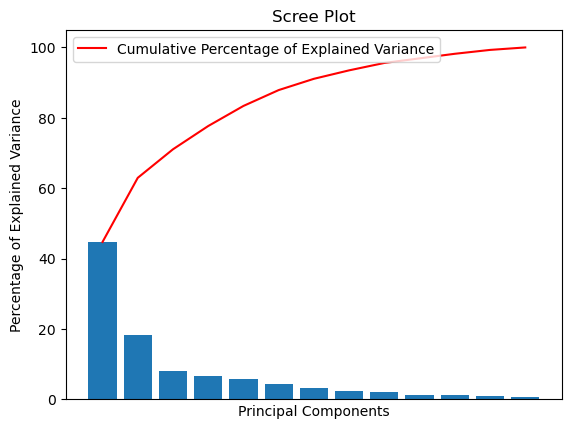

In [24]:
pca = PCA()
x_train_pca = pca.fit_transform(x_train)

per_var = np.round(pca.explained_variance_ratio_ * 100, decimals=1)

plt.bar(range(1, len(per_var) + 1), per_var)

plt.plot(range(1, len(per_var) + 1), 
        np.cumsum(per_var),
        c='red',
        label='Cumulative Percentage of Explained Variance')

plt.tick_params(axis='x', which='both', bottom=False, top=False, labelbottom=False)
plt.xlabel('Principal Components')
plt.ylabel('Percentage of Explained Variance')
plt.title('Scree Plot')
plt.legend(loc='upper left')
plt.show()

The graph shows that the first Principal Component PC1 accounts for a large amount of variation in the data.

The second Principal Component PC2 is much less responsible than PC1 but still much more than PC3 and PC4.

Therefore, in the two-dimensional graph, I'll use PC1 and PC2.

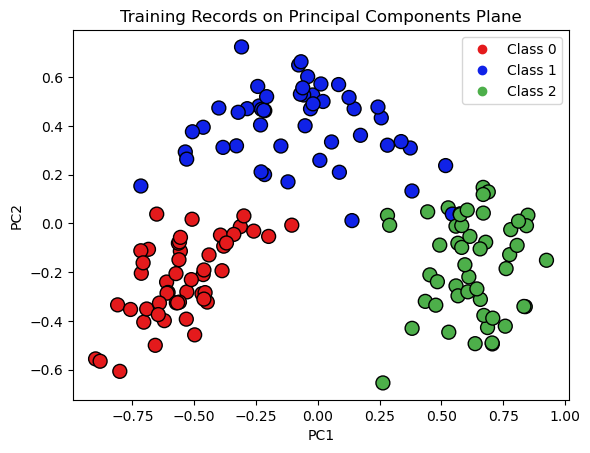

In [25]:
colormap = colors.ListedColormap(['#e41a1c', '#1022e8', '#4daf4a'])

scatter = plt.scatter(
    x_train_pca[:, 0],
    x_train_pca[:, 1],
    c=y_train.values,
    cmap=colormap,
    s=100,
    edgecolors='k',
)

legend_labels = ['Class 0', 'Class 1', 'Class 2']
legend = plt.legend(handles=scatter.legend_elements()[0], labels=legend_labels)

plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('Training Records on Principal Components Plane')

plt.show()

I immediately notice that the records are grouped by classes. There is a clear distinction between classes 0 and 2, while class 1 tends to mix with the other two.

### Decision Boundary

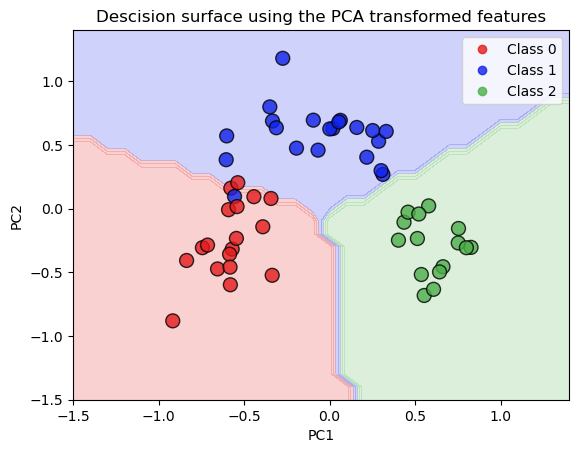

In [26]:
# scale the training set
scaler = MinMaxScaler(feature_range=(-1, 1))
x_train_pca_scaled = scaler.fit_transform(x_train_pca)

# transform the test set with scaler and PCA
x_test_pca = pca.transform(x_test)
x_test_pca_scaled = scaler.transform(x_test_pca)

# train the ridge model defined before
ridge.fit(x_train_pca_scaled[:, 0:2], y_train.values.ravel())

# create a matrix of points that I can use to display decision boundaries
# the points are between -1 and 1, so I construct the matrix from -1.5 to 1.5 so that the points are not on the edge
xx, yy = np.meshgrid(np.arange(start=-1.5, stop=1.5, step=0.1), np.arange(start=-1.5, stop=1.5, step=0.1))

# classify the points in the matrix
z = ridge.predict(np.column_stack((xx.ravel(), yy.ravel())))

# reshape z so that each classification corresponds to a point in the matrix
z = z.reshape(xx.shape)

# draw the contour plot
plt.contourf(xx, yy, z, alpha=0.2, cmap=colormap)

# create custom colors for the points in the scatter plot
colormap = colors.ListedColormap(['#e41a1c', '#1022e8', '#4daf4a'])

# draw the scatter plot
scatter = plt.scatter(
    x_test_pca_scaled[:, 0],
    x_test_pca_scaled[:, 1],
    c=y_test.values.ravel(),
    cmap=colormap,
    s=100,
    edgecolors='k',
    alpha=0.8,
)

# add the legend
legend_labels = ['Class 0', 'Class 1', 'Class 2']
legend = plt.legend(handles=scatter.legend_elements()[0], labels=legend_labels)

# add the row labels and the title
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('Descision surface using the PCA transformed features')

plt.show()

The red area represents where points are predicted to be of class 0, the blue area represents where points are predicted to be of class 1, and the green area represents where points are predicted to be of class 2.

The points represent the records of the training set as indicated by the legend.

As I saw for the training set, the records are fairly grouped by classes, with the only difficulty arising where class 0 meets class 1.

In this representation, errors between classes 0 and 1 are also noticeable, even though the model previously achieved a perfect result. This happens because reducing to only 2 features loses some information.

## Conclusion

The Ridge Classifier model works perfectly, correctly identifying all records and also offering the possibility to reduce the number of features.